In [33]:
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline

%matplotlib inline

In [34]:
import random

import torch

In [ ]:
def synthetic_data(w, b, num_examples):
    """根据参数生成虚假的数据集"""
    X = torch.normal(0, 1, (num_examples, len(w)))  # 标准正态分布采样 X
    # @ 矩阵乘法计算 如果其中一个参数是向量的话 自动转化为列向量 无需手动转换
    y = X @ w + b  # Y = X*w + b
    y += torch.normal(0, 0.01, y.shape) # 增加高斯噪音
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-0.4819, -1.1318]) 
label: tensor([-5.4753])


In [48]:
def use_svg_display():
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    """设置matplotlib的图标大小"""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

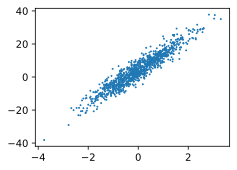

In [ ]:
set_figsize()
# 为什么使用输入数据的第 2 列？ 因为 -3.4 的绝对值大于 2 因此第二列数据的线性更强
plt.scatter(features[:, 1].numpy(), labels.numpy(), s=1)  # s 点的大小

In [38]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [39]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.0905,  0.3715],
        [-1.0181, -0.3018],
        [-0.4818, -0.5616],
        [ 0.2070, -2.8845],
        [ 0.1254, -0.0084],
        [-0.6055,  0.3325],
        [ 0.9474, -0.4116],
        [ 0.4940,  0.0489],
        [ 0.2863, -0.9028],
        [-0.8745,  0.4931]]) 
 tensor([[ 5.2594],
        [ 7.0542],
        [ 4.7247],
        [-2.2751],
        [ 3.7418],
        [ 6.9303],
        [ 0.1613],
        [ 2.6230],
        [ 1.4107],
        [ 8.1498]])


In [40]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)  # 初始化参数 w 并且 w 为列向量
b = torch.zeros(1, requires_grad=True)  # 初始化 b 全零

In [41]:
def linreg(X, w, b):
    """线性回归模型"""
    return torch.matmul(X, w) + b   # X @ w 与 torch.matmul(X, w) 等价

In [42]:
def squared_loss(y_hat, y):
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [43]:
def sgd(params, lr, batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()  # 清空梯度

In [44]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.042865
epoch 2, loss 0.000168
epoch 3, loss 0.000048


In [45]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([0.0002, 0.0011], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0006], grad_fn=<RsubBackward1>)
